# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

Taken from UDEMY course 100 Days of Code: The Complete Python Pro Bootcamp. All solutions by mo1der.

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 47.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df = pd.read_csv('mission_launches.csv')


# Preliminary Data Exploration

* What is the shape of `df`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df.shape

(4324, 9)

In [ ]:
print(f"Data have {df.shape[0]} rows and {df.shape[1]} columns.")

Data have 4324 rows and 9 columns.


In [ ]:
print(f"Columns names are: {', '.join(df.columns.values.tolist())}.")

Columns names are: Unnamed: 0, Unnamed: 0.1, Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status.


In [ ]:
df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [ ]:
df.duplicated().any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
df.columns = [x.lower() for x in df.columns]

In [ ]:
df.organisation = df.organisation.str.replace("?","e")

<ipython-input-13-fb7b79614d4f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.organisation = df.organisation.str.replace("?","e")


In [ ]:
df[:3]

,organisation,location,date,detail,rocket_status,price,mission_status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


In [ ]:
df.dtypes

organisation      object
location          object
date              object
detail            object
rocket_status     object
price             object
mission_status    object
dtype: object

## Descriptive Statistics

In [ ]:
df.mission_status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: mission_status, dtype: int64

In [ ]:
len(df[df.mission_status=="Success"])

3879

In [ ]:
df.price = df.price.str.replace(',','')

In [ ]:
df.price = df.price.astype('float64')

In [ ]:
df.price.describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: price, dtype: float64

In [ ]:
print(f'Mission status summary: success: {len(df[df.mission_status=="Success"])} missions, {100*len(df[df.mission_status=="Success"])/len(df.mission_status):.3}%')

Mission status summary: success: 3879 missions, 89.7%


In [ ]:
df.rocket_status.value_counts()

StatusRetired    3534
StatusActive      790
Name: rocket_status, dtype: int64

In [ ]:
df.organisation.value_counts()[:10]

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: organisation, dtype: int64

In [ ]:
df[df.organisation == "SpaceX"][:5]

,organisation,location,date,detail,rocket_status,price,mission_status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.00,Success
20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 13, 2020 09:21 UTC",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.00,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_by_organisation = df.organisation.value_counts()

In [ ]:
launches_by_organisation[:11]

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
Name: organisation, dtype: int64

In [ ]:
biggest_launches_by_organisation = launches_by_organisation.copy()
biggest_launches_by_organisation=pd.DataFrame(biggest_launches_by_organisation)
biggest_launches_by_organisation.rename(columns={'organisation':'launches_number'}, inplace=True)
biggest_launches_by_organisation.reset_index(inplace=True)
biggest_launches_by_organisation.rename(columns = {'index':'organization'}, inplace=True)
biggest_launches_by_organisation[:5]


,organization,launches_number
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203


In [ ]:
biggest_launches_by_organisation.loc[biggest_launches_by_organisation['launches_number'] < 100, 'organization'] = 'other'
biggest_launches_by_organisation = biggest_launches_by_organisation.groupby('organization')['launches_number'].sum().reset_index()
biggest_launches_by_organisation.sort_values(by=['launches_number'], ascending=False)

,organization,launches_number
6,RVSN USSR,1777
11,other,711
0,Arianespace,279
2,CASC,251
3,General Dynamics,251
5,NASA,203
10,VKS RF,201
9,US Air Force,161
8,ULA,140
1,Boeing,136


In [ ]:
fig = px.pie(
    labels=biggest_launches_by_organisation.organization, 
    values=biggest_launches_by_organisation.launches_number,
    title="Number of Launches per Company",
    names=biggest_launches_by_organisation.organization,
    hole=0.2,
    color=biggest_launches_by_organisation.launches_number,
    )    
fig.update_traces(
    textposition='inside', 
    textfont_size=12,
    textinfo='percent+label',
    )
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
rockets_anaysis_data = df.rocket_status.value_counts()
rockets_anaysis_data

StatusRetired    3534
StatusActive      790
Name: rocket_status, dtype: int64

In [ ]:
rockets_anaysis_data["StatusRetired"]

3534

In [ ]:
rockets_anaysis_data["StatusActive"]

790

In [ ]:
print(f'Number of rockets active: {rockets_anaysis_data["StatusActive"]}, compared to number of rockets decomissioned {rockets_anaysis_data["StatusRetired"]}. That is {(rockets_anaysis_data["StatusActive"])/(rockets_anaysis_data["StatusActive"]+rockets_anaysis_data["StatusRetired"])*100:.3}% of total rockets.')

Number of rockets active: 790, compared to number of rockets decomissioned 3534. That is 18.3% of total rockets.


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status_data = df.mission_status.value_counts()
mission_status_data = pd.DataFrame(mission_status_data)
mission_status_data.reset_index(inplace=True)
mission_status_data.rename(columns = {'index':'mission_status', 'mission_status': 'number_of_missions'}, inplace=True)
mission_status_data


,mission_status,number_of_missions
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [ ]:
mission_status_data['precentage_of_missions'] = mission_status_data.number_of_missions / mission_status_data.number_of_missions.sum()
mission_status_data

,mission_status,number_of_missions,precentage_of_missions
0,Success,3879,0.90
1,Failure,339,0.08
2,Partial Failure,102,0.02
3,Prelaunch Failure,4,0.00


In [ ]:
fig2 = px.pie(
    labels=mission_status_data.mission_status, 
    values=mission_status_data.number_of_missions,
    title="Successful vs Failed missions",
    names=mission_status_data.mission_status,
    hole=0.2,
    color=mission_status_data.number_of_missions,
    )    
fig2.update_traces(
    textposition='outside', 
    textfont_size=12,
    textinfo='percent+label',
    )
fig2.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
launches_cost = df.copy()
launches_cost = launches_cost.dropna(subset=['price'])
launches_cost.describe()


,price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


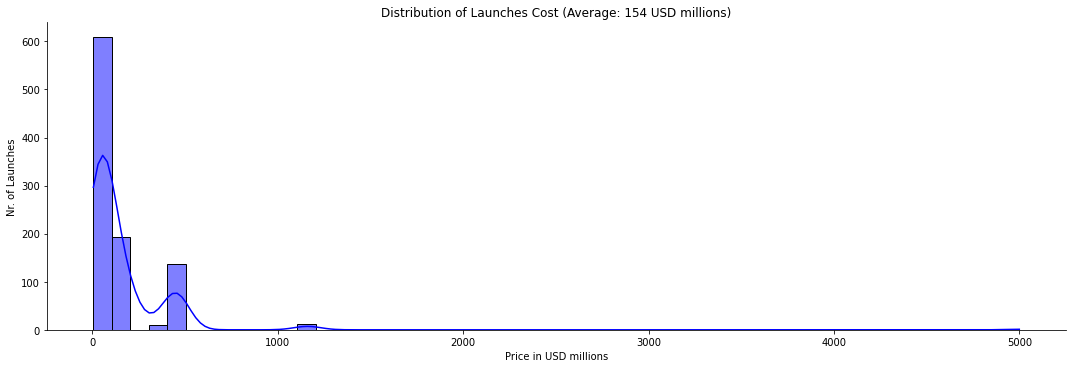

In [ ]:
sns.displot(data=launches_cost, 
            x="price",
            aspect=3,
            kde=True, 
            bins=50,
            color="blue",
            )
plt.title(f'Distribution of Launches Cost (Average: {round(launches_cost.price.mean())} USD millions)')
plt.xlabel('Price in USD millions')
plt.ylabel('Nr. of Launches')
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
locations = df.location.str.split(', ', expand=True)
locations.columns = ['site', 'place', 'region', 'country']
locations[locations.country.isna()]

,site,place,region,country
1,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,None
3,Site 200/39,Baikonur Cosmodrome,Kazakhstan,None
5,LC-9,Taiyuan Satellite Launch Center,China,None
6,Site 31/6,Baikonur Cosmodrome,Kazakhstan,None
7,LC-101,Wenchang Satellite Launch Center,China,None
...,...,...,...,...
4301,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None
4313,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None
4315,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None
4322,Site 1/5,Baikonur Cosmodrome,Kazakhstan,None


In [ ]:
cond = (locations.country.isna())
locations.loc[cond, 'country'] = locations.loc[cond, 'region']

In [ ]:
locations[locations.country.isna()]

,site,place,region,country
26,Xichang Satellite Launch Center,China,None,None
35,Launch Plateform,Shahrud Missile Test Site,None,None
75,Taiyuan Satellite Launch Center,China,None,None
133,Tai Rui Barge,Yellow Sea,None,None
143,Taiyuan Satellite Launch Center,China,None,None
218,Taiyuan Satellite Launch Center,China,None,None
273,Uchinoura Space Center,Japan,None,None
377,Uchinoura Space Center,Japan,None,None
587,Jiuquan Satellite Launch Center,China,None,None
924,Svobodny Cosmodrome,Russia,None,None


In [ ]:
cond = (locations.country.isna())
locations.loc[cond, 'country'] = locations.loc[cond, 'place']
locations[locations.country.isna()]

,site,place,region,country


In [ ]:
# Changing some country names.
# Russia is the Russian Federation
# New Mexico should be USA
# Yellow Sea refers to China
# Shahrud Missile Test Site should be Iran
# Pacific Missile Range Facility should be USA
# Barents Sea should be Russian Federation
# Gran Canaria should be USA
# Pacific Ocean should be USA
dict_of_changes = {'Russia':'Russian Federation', 'New Mexico':'USA', 'Yellow Sea':'China', 'Shahrud Missile Test Site':'Iran', 'Pacific Missile Range Facility':'USA', 'Barents Sea':'Russian Federation', 'Gran Canaria':'USA', 'Pacific Ocean':'USA'}
for _ in dict_of_changes:
  cond = (locations.country == _)
  locations.loc[cond, 'country'] = dict_of_changes[_]
locations.country.value_counts()

Russian Federation    1398
USA                   1387
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
South Korea              3
Brazil                   3
Name: country, dtype: int64

In [ ]:
df['country'] = locations.country
df.sample(3)

,organisation,location,date,detail,rocket_status,price,mission_status,country
1237,Boeing,"SLC-17B, Cape Canaveral AFS, Florida, USA","Tue Aug 17, 1999 04:37 UTC",Delta II 7420-10C | Globalstar 6,StatusRetired,NaN,Success,USA
204,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Wed Oct 24, 2018 22:57 UTC",Long March 4B | Haiyang-2B,StatusActive,64.68,Success,China
2274,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Sun Apr 17, 1983 18:45 UTC",Titan III(24)B | OPS 2925,StatusRetired,NaN,Success,USA


In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from iso3166 import countries

In [ ]:
locations.dtypes

site       object
place      object
region     object
country    object
dtype: object

In [ ]:

def country_name_to_code(country_name):
    try:
        return countries.get(country_name).alpha3
    except:
        return None
locations['country_code'] = locations['country'].apply(country_name_to_code)
locations.country_code.value_counts()

RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: country_code, dtype: int64

In [ ]:
df['country_code'] = locations['country_code']

In [ ]:
df.sample(3)

,organisation,location,date,detail,rocket_status,price,mission_status,country,country_code
3828,General Dynamics,"LC-13, Cape Canaveral AFS, Florida, USA","Sun Nov 06, 1966 23:21 UTC",Atlas-SLV3 Agena-D | Lunar Orbiter 2,StatusRetired,NaN,Success,USA,USA
2263,General Dynamics,"SLC-3E, Vandenberg AFB, California, USA","Thu Jun 09, 1983 23:23 UTC",Atlas-H MSD | NOSS-6,StatusRetired,NaN,Success,USA,USA
48,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Tue Feb 18, 2020 22:18 UTC",Ariane 5 ECA | JCSAT-17 & GEO-KOMPSAT 2B,StatusActive,200.00,Success,France,FRA


In [ ]:
df_country_launches = df.country_code.value_counts()
df_country_launches

RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
NZL      13
ISR      11
KEN       9
AUS       6
BRA       3
Name: country_code, dtype: int64

In [ ]:
df_country_launches = pd.DataFrame(df_country_launches)
df_country_launches.reset_index(inplace=True)
df_country_launches.rename(columns = {'index':'country_code', 'country_code':'launches_number'}, inplace=True)

In [ ]:
df_country_launches.dtypes

country_code       object
launches_number     int64
dtype: object

In [ ]:
df_country_launches=pd.merge(df[['country', 'country_code']], df_country_launches, on='country_code', how='right')
df_country_launches.drop_duplicates()


,country,country_code,launches_number
0,Russian Federation,RUS,1398
1398,USA,USA,1387
2785,Kazakhstan,KAZ,701
3486,France,FRA,303
3789,China,CHN,269
4058,Japan,JPN,126
4184,India,IND,76
4260,New Zealand,NZL,13
4273,Israel,ISR,11
4284,Kenya,KEN,9


In [ ]:
world_map = px.choropleth(df_country_launches,
                          locations='country_code',
                          color='launches_number', 
                          hover_name='country',
                          hover_data=['launches_number'],
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Number of Launches by Country",
                          )
world_map.update_layout(
    coloraxis_showscale=True,
    title=dict(
        text="<b>Number of Launches by Country</b>",
        x=0.5,
        xanchor="center",
        y=0.9,
        yanchor="top",
        font=dict(size=24, color="#444"),
    )
)
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df.sample(2)

,organisation,location,date,detail,rocket_status,price,mission_status,country,country_code
4200,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Sep 09, 1961 19:28 UTC",Atlas-LV3 Agena-B | Samos 3,StatusRetired,NaN,Failure,USA,USA
1161,MITT,"Svobodny Cosmodrome, Russia","Tue Dec 05, 2000 12:32 UTC",Start-1 | EROS A,StatusActive,NaN,Success,Russian Federation,RUS


In [ ]:
missions_faulures_country = df.groupby(["country", "country_code", "mission_status"], as_index=False).agg({"location": pd.Series.count})
missions_faulures_country = missions_faulures_country[missions_faulures_country.mission_status=='Failure']
missions_faulures_country.rename(columns={'location':'failure_number'}, inplace=True)
missions_faulures_country

,country,country_code,mission_status,failure_number
0,Australia,AUS,Failure,3
2,Brazil,BRA,Failure,2
4,China,CHN,Failure,19
7,France,FRA,Failure,13
10,India,IND,Failure,8
13,Israel,ISR,Failure,2
15,Japan,JPN,Failure,10
18,Kazakhstan,KAZ,Failure,72
23,New Zealand,NZL,Failure,2
25,Russian Federation,RUS,Failure,63


In [ ]:
world_map2 = px.choropleth(missions_faulures_country,
                          locations='country_code',
                          color='failure_number', 
                          hover_name='country',
                          hover_data=['failure_number'],
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Number of Failures by Country",
                          )
world_map2.update_layout(
    coloraxis_showscale=True,
    title=dict(
        text="<b>Number of Failures by Country</b>",
        x=0.5,
        xanchor="center",
        y=0.9,
        yanchor="top",
        font=dict(size=24, color="#444"),
    )
)
world_map2.show()

In [ ]:
missions_country = df.groupby(["country", "country_code", "mission_status"], as_index=False).agg({"location": pd.Series.count})
missions_country.rename(columns={'location':'total_missions'}, inplace=True)
missions_country[:5]

,country,country_code,mission_status,total_missions
0,Australia,AUS,Failure,3
1,Australia,AUS,Success,3
2,Brazil,BRA,Failure,2
3,Brazil,BRA,Prelaunch Failure,1
4,China,CHN,Failure,19


In [ ]:
missions_country2 = pd.pivot_table(df, 
index='country_code',
columns='mission_status', 
values='country',
aggfunc='count')
margins=True
missions_country2 = missions_country2.fillna(0)   
missions_country2['total_missions'] = missions_country2['Failure'] + missions_country2['Partial Failure'] + missions_country2['Prelaunch Failure'] + missions_country2['Success']
missions_country2['success_perc'] = missions_country2['Success'] / missions_country2['total_missions']
missions_country2['success_perc_100'] = round(missions_country2['success_perc']*100)
missions_country2=pd.merge(df[['country', 'country_code']], missions_country2, on='country_code', how='right')
missions_country2 = missions_country2.drop_duplicates()
missions_country2


,country,country_code,Failure,Partial Failure,Prelaunch Failure,Success,total_missions,success_perc,success_perc_100
0,Australia,AUS,3.00,0.00,0.00,3.00,6.00,0.50,50.00
6,Brazil,BRA,2.00,0.00,1.00,0.00,3.00,0.00,0.00
9,China,CHN,19.00,6.00,0.00,244.00,269.00,0.91,91.00
278,France,FRA,13.00,5.00,0.00,285.00,303.00,0.94,94.00
581,India,IND,8.00,5.00,0.00,63.00,76.00,0.83,83.00
657,Israel,ISR,2.00,0.00,0.00,9.00,11.00,0.82,82.00
668,Japan,JPN,10.00,3.00,0.00,113.00,126.00,0.90,90.00
794,Kazakhstan,KAZ,72.00,20.00,1.00,608.00,701.00,0.87,87.00
1495,Kenya,KEN,0.00,0.00,0.00,9.00,9.00,1.00,100.00
1504,New Zealand,NZL,2.00,0.00,0.00,11.00,13.00,0.85,85.00


In [ ]:
world_map3 = px.choropleth(missions_country2,
                          locations='country_code',
                          color='success_perc_100', 
                          hover_name='country',
                          hover_data=['Success'],
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Successful missions percentage by Country",
                          )
world_map3.update_layout(
    coloraxis_showscale=True,
    title=dict(
        text="<b>Successful missions percentage by Country</b>",
        x=0.5,
        xanchor="center",
        y=0.9,
        yanchor="top",
        font=dict(size=24, color="#444"),
    )
)
world_map3.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df.sample(2)

,organisation,location,date,detail,rocket_status,price,mission_status,country,country_code
3502,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 23, 1969 09:25 UTC",Tsyklon-2 | Cosmos 316,StatusRetired,NaN,Success,Kazakhstan,KAZ
2372,RVSN USSR,"Site 16/2, Plesetsk Cosmodrome, Russia","Sat Oct 31, 1981 22:53 UTC",Molniya-M /Block 2BL | Cosmos 1317,StatusRetired,NaN,Success,Russian Federation,RUS


In [ ]:
missions_country3 = pd.pivot_table(df, 
index='organisation',
columns='mission_status', 
values='country',
aggfunc='count')
margins=True

missions_country3 = missions_country3.fillna(0)   
missions_country3 = missions_country3.reset_index()
missions_country3['total_missions'] = missions_country3['Failure'] + missions_country3['Partial Failure'] + missions_country3['Prelaunch Failure'] + missions_country3['Success']
missions_country3.sample(3)

mission_status,organisation,Failure,Partial Failure,Prelaunch Failure,Success,total_missions
6,Boeing,3.00,2.00,0.00,131.00,136.00
29,Land Launch,0.00,1.00,0.00,6.00,7.00
32,MHI,2.00,2.00,0.00,80.00,84.00


In [ ]:
missions_country3=pd.merge(df[['country', 'country_code', 'organisation']], missions_country3, on='organisation', how='right')
missions_country3.drop_duplicates(inplace=True)
missions_country3 = missions_country3.sort_values(by=['country', 'organisation'])
missions_country3

,country,country_code,organisation,Failure,Partial Failure,Prelaunch Failure,Success,total_missions
3,Australia,AUS,AMBA,3.00,1.00,0.00,4.00,8.00
708,Australia,AUS,CECLES,3.00,0.00,0.00,1.00,4.00
1808,Australia,AUS,RAE,1.00,0.00,0.00,1.00,2.00
0,Brazil,BRA,AEB,2.00,0.00,1.00,0.00,3.00
451,China,CHN,CASC,14.00,6.00,0.00,231.00,251.00
...,...,...,...,...,...,...,...,...
3695,USA,USA,SpaceX,4.00,1.00,1.00,94.00,100.00
3796,USA,USA,ULA,0.00,1.00,0.00,139.00,140.00
3936,USA,USA,US Air Force,30.00,2.00,0.00,129.00,161.00
4097,USA,USA,US Navy,14.00,1.00,0.00,2.00,17.00


In [ ]:
burst = px.sunburst(missions_country3, 
                    path=['country', 'organisation'], 
                    values='total_missions',
                    title='Countries, organisations, and mission status',
                   )
 
burst.update_layout(xaxis_title='Axis title', 
                    yaxis_title='Yazis title',
                    coloraxis_showscale=False,
autosize=False,
    width=800,
    height=800,
)
burst.show()

In [ ]:
mission_by_country_and_org = df.groupby(["country", "organisation", "mission_status"] , as_index=False).agg({'rocket_status': pd.Series.count})
mission_by_country_and_org.rename(columns={'rocket_status':'total_missions'}, inplace=True)
mission_by_country_and_org.sample(5)

,country,organisation,mission_status,total_missions
61,Kazakhstan,Roscosmos,Success,44
88,South Korea,KARI,Failure,2
108,USA,Martin Marietta,Partial Failure,3
14,China,Landspace,Failure,1
83,Russian Federation,SRC,Success,2


In [ ]:
burst2 = px.sunburst(mission_by_country_and_org, 
                    path=['country', 'organisation', 'mission_status'], 
                    values='total_missions',
                    title='Countries, organisations, and mission status',
                   )
 
burst2.update_layout(xaxis_title='Axis title', 
                    yaxis_title='Yazis title',
                    coloraxis_showscale=False,
autosize=False,
    width=800,
    height=800,
)
burst2.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_by_country_and_org = df.groupby(["country", "organisation"] , as_index=False).agg({'price': pd.Series.sum})
money_by_country_and_org.rename(columns={'price':'total_money_spend'}, inplace=True)
money_by_country_and_org.sort_values(by='total_money_spend', ascending=False, inplace=True)
money_by_country_and_org[:10]

,country,organisation,total_money_spend
56,USA,NASA,"76,280.00"
10,France,Arianespace,"16,248.00"
61,USA,ULA,"14,798.00"
28,Kazakhstan,RVSN USSR,"10,000.00"
4,China,CASC,"6,340.26"
60,USA,SpaceX,"5,444.00"
57,USA,Northrop,"3,930.00"
21,Japan,MHI,"3,532.50"
15,India,ISRO,"2,177.00"
62,USA,US Air Force,"1,550.92"


In [ ]:
bar = px.bar(x=money_by_country_and_org['organisation'][:10].str.cat(money_by_country_and_org['country'][:10], sep=', '),
             y=money_by_country_and_org.total_money_spend[:10],
             color=money_by_country_and_org.total_money_spend[:10],
             color_continuous_scale=px.colors.sequential.haline,
             title='Total Amount of Money Spent by Organisation on Space Missions',
             )
bar.update_layout(xaxis_title='Organization name', 
                  yaxis_title='Total money spend',
                  )
bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money_per_launch = df.groupby(["country", "organisation"], as_index=False).agg({'price': pd.Series.mean})
money_per_launch.rename(columns={'price':'average_cost'}, inplace=True)
money_per_launch.sort_values(by='average_cost', ascending=True, inplace=True)
money_per_launch.dropna(subset=['average_cost'], inplace=True)
money_per_launch[:10]

,country,organisation,average_cost
34,New Zealand,Rocket Lab,7.50
64,USA,Virgin Orbit,12.00
58,USA,Sandia,15.00
50,USA,EER,20.00
6,China,ExPace,28.30
38,Russian Federation,Kosmotras,29.00
25,Kazakhstan,Kosmotras,29.00
15,India,ISRO,32.49
54,USA,Lockheed,35.00
14,France,ESA,37.00


In [ ]:
bar2 = px.bar(x=money_per_launch['organisation'][:20].str.cat(money_per_launch['country'][:20], sep=', '),
             y=money_per_launch.average_cost[:20],
             color=money_per_launch.average_cost[:20],
             color_continuous_scale=px.colors.sequential.haline,
             title='Amount of Money Spent by Organisation per Launch',
             )
bar2.update_layout(xaxis_title='Organization name, country', 
                  yaxis_title='Average money spend',
                  )
bar2.show()

# Chart the Number of Launches per Year

In [ ]:
df.sample(1)

,organisation,location,date,detail,rocket_status,price,mission_status,country,country_code
1282,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Wed Oct 28, 1998 22:15 UTC","Ariane 44L | Afristar, GE-5",StatusRetired,NaN,Success,France,FRA


In [ ]:
df.dtypes

organisation       object
location           object
date               object
detail             object
rocket_status      object
price             float64
mission_status     object
country            object
country_code       object
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
import pytz
timezone = pytz.timezone("UTC")
df['date'] = df['date'].apply(lambda x: x.astimezone(timezone))

In [ ]:
df.dtypes

organisation                   object
location                       object
date              datetime64[ns, UTC]
detail                         object
rocket_status                  object
price                         float64
mission_status                 object
country                        object
country_code                   object
dtype: object

In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df['month'] = df['date'].dt.month
df.sample(2)

,organisation,location,date,detail,rocket_status,price,mission_status,country,country_code,year,month
919,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2006-05-27 21:09:00+00:00,Ariane 5 ECA | Satmex-6 & Thaicom-5,StatusActive,200.00,Success,France,FRA,2006,5
1399,MITT,"Svobodny Cosmodrome, Russia",1997-03-04 02:00:00+00:00,Start-1 | Zeya,StatusActive,NaN,Success,Russian Federation,RUS,1997,3


In [ ]:
# Chart the Number of Launches per Year
launches_per_year = df.groupby(["year"], as_index=False).agg({'mission_status': pd.Series.count})
launches_per_year.rename(columns={'mission_status':'launches_in_year'}, inplace=True)
launches_per_year

,year,launches_in_year
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [ ]:

l_chart = px.line(
    launches_per_year,
    launches_per_year["year"], 
    launches_per_year["launches_in_year"], 
    title='Number of Launches per Year',
)
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of launches',
                      xaxis=dict(showgrid=True,
                                tickmode="auto",
                                nticks=40,
                                 ),
                      yaxis=dict(showgrid=True),
                                 )
l_chart.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
monthly_count = df.groupby(['month']).count()['mission_status']
monthly_count = monthly_count.reset_index()
monthly_count.rename(columns={'mission_status':'launches_by_month'}, inplace=True)
monthly_count['month_datetime'] = pd.to_datetime(monthly_count['month'].astype(str), format='%m')
monthly_count['month_name'] = monthly_count['month_datetime'].dt.strftime('%B')
monthly_count

,month,launches_by_month,month_datetime,month_name
0,1,268,1900-01-01,January
1,2,336,1900-02-01,February
2,3,353,1900-03-01,March
3,4,383,1900-04-01,April
4,5,326,1900-05-01,May
5,6,402,1900-06-01,June
6,7,351,1900-07-01,July
7,8,373,1900-08-01,August
8,9,365,1900-09-01,September
9,10,381,1900-10-01,October


In [ ]:
chart = px.line(monthly_count, x=monthly_count.month_name, y=monthly_count.launches_by_month,
                title='Number of Launches per Month')

# superimpose a rolling average on the chart
chart.add_scatter(x=monthly_count.month_name, y=monthly_count.launches_by_month.rolling(window=3).mean(),
                  name='Rolling Average (window=3)',
                  line=dict(width=2, color='green'))

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
monthly_count.sort_values(by=['launches_by_month'], ascending=False, inplace=True)
monthly_count

,month,launches_by_month,month_datetime,month_name
11,12,450,1900-12-01,December
5,6,402,1900-06-01,June
3,4,383,1900-04-01,April
9,10,381,1900-10-01,October
7,8,373,1900-08-01,August
8,9,365,1900-09-01,September
2,3,353,1900-03-01,March
6,7,351,1900-07-01,July
1,2,336,1900-02-01,February
10,11,336,1900-11-01,November


In [ ]:
print(f'Month with biggest number of launches is: {monthly_count["month_name"][monthly_count["launches_by_month"].idxmax()]}, and with lowest: {monthly_count["month_name"][monthly_count["launches_by_month"].idxmin()]}.')

Month with biggest number of launches is: December, and with lowest: January.


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
df.price.isna().sum()

3360

In [ ]:
df_with_mission_prices = df[['year', 'price', 'country', 'country_code', 'organisation', 'mission_status']]
len(df_with_mission_prices)

4324

In [ ]:
df_with_mission_prices.dropna(subset=['price'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_with_mission_prices.price.isna().sum()

0

In [ ]:
annual_launch_price = df_with_mission_prices.groupby(["year"], as_index=False).agg({'price': pd.Series.mean})
annual_launch_price.rename(columns={'price':'annual_price'}, inplace=True)
annual_launch_price.annual_price.describe()

count      50.00
mean      330.50
std       372.03
min        56.65
25%        97.48
50%       191.11
75%       360.92
max     1,687.20
Name: annual_price, dtype: float64

In [ ]:
l_chart_a = px.line(annual_launch_price,
                  x='year', 
                  y='annual_price',
                  title='How has the Launch Price varied Over Time',
                  # color='year',
                  # hover_name='annual_price'
                  )
 
l_chart_a.update_layout(xaxis_title='Year',
                      yaxis_title='Average price',
                      xaxis=dict(showgrid=True,
                                tickmode="auto",
                                nticks=40,
                                 ),
                        ) 
l_chart_a.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
# creating list of Top 10 organizations
top10_org = df.groupby(["organisation"], as_index=False).agg({'mission_status': pd.Series.count})
top10_org.rename(columns={'mission_status': 'total_missions'}, inplace=True)
top10_org.sort_values(by='total_missions', ascending=False, inplace=True)
top10_org = top10_org[:10]
top10_org

,organisation,total_missions
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [ ]:
top10_org_list = top10_org['organisation'].to_list()
top10_org_list


['RVSN USSR',
 'Arianespace',
 'General Dynamics',
 'CASC',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [ ]:
launches_over_time_by_org = pd.pivot_table(df[df["organisation"].isin(top10_org_list)], 
index='organisation',
columns='year', 
values='mission_status',
aggfunc='count')
margins=True
launches_over_time_by_org = launches_over_time_by_org.fillna(0) 
launches_over_time_by_org

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
organisation,,,,,,,,,,,,,,,,,,,,,
Arianespace,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.00,9.00,7.00,11.00,12.00,11.00,11.00,11.00,9.00,4.00
Boeing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CASC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,1.00,1.00,0.00,2.00,22.00,16.00,37.00,27.00,19.00
General Dynamics,0.00,0.00,1.00,5.00,8.00,14.00,9.00,18.00,19.00,33.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Martin Marietta,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NASA,0.00,2.00,1.00,4.00,12.00,5.00,2.00,4.00,9.00,8.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
RVSN USSR,2.00,5.00,4.00,9.00,9.00,22.00,24.00,36.00,53.00,51.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ULA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,11.00,10.00,11.00,14.00,12.00,12.00,8.00,8.00,5.00,4.00
US Air Force,0.00,2.00,10.00,21.00,23.00,41.00,6.00,2.00,2.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


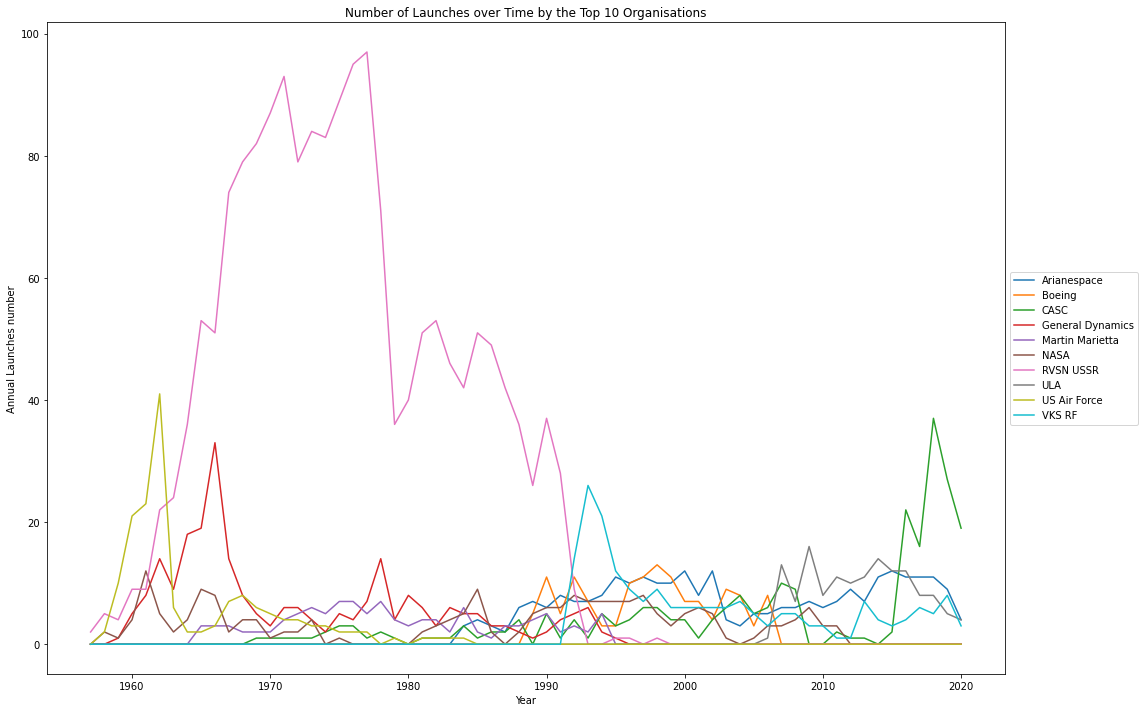

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
launches_over_time_by_org.T.plot(kind='line', ax=ax)
plt.xlabel('Year')
plt.ylabel('Annual Launches number')
plt.title('Number of Launches over Time by the Top 10 Organisations')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [ ]:
cumulative_launches_over_time_by_org = launches_over_time_by_org.T.cumsum().T
cumulative_launches_over_time_by_org 

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
organisation,,,,,,,,,,,,,,,,,,,,,
Arianespace,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,194.00,203.00,210.00,221.00,233.00,244.00,255.00,266.00,275.00,279.00
Boeing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,136.00,136.00,136.00,136.00,136.00,136.00,136.00,136.00,136.00,136.00
CASC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,126.00,127.00,128.00,128.00,130.00,152.00,168.00,205.00,232.00,251.00
General Dynamics,0.00,0.00,1.00,6.00,14.00,28.00,37.00,55.00,74.00,107.00,...,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00,251.00
Martin Marietta,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,6.00,...,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00,114.00
NASA,0.00,2.00,3.00,7.00,19.00,24.00,26.00,30.00,39.00,47.00,...,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00,203.00
RVSN USSR,2.00,7.00,11.00,20.00,29.00,51.00,75.00,111.00,164.00,215.00,...,"1,777.00","1,777.00","1,777.00","1,777.00","1,777.00","1,777.00","1,777.00","1,777.00","1,777.00","1,777.00"
ULA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,56.00,66.00,77.00,91.00,103.00,115.00,123.00,131.00,136.00,140.00
US Air Force,0.00,2.00,12.00,33.00,56.00,97.00,103.00,105.00,107.00,110.00,...,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00


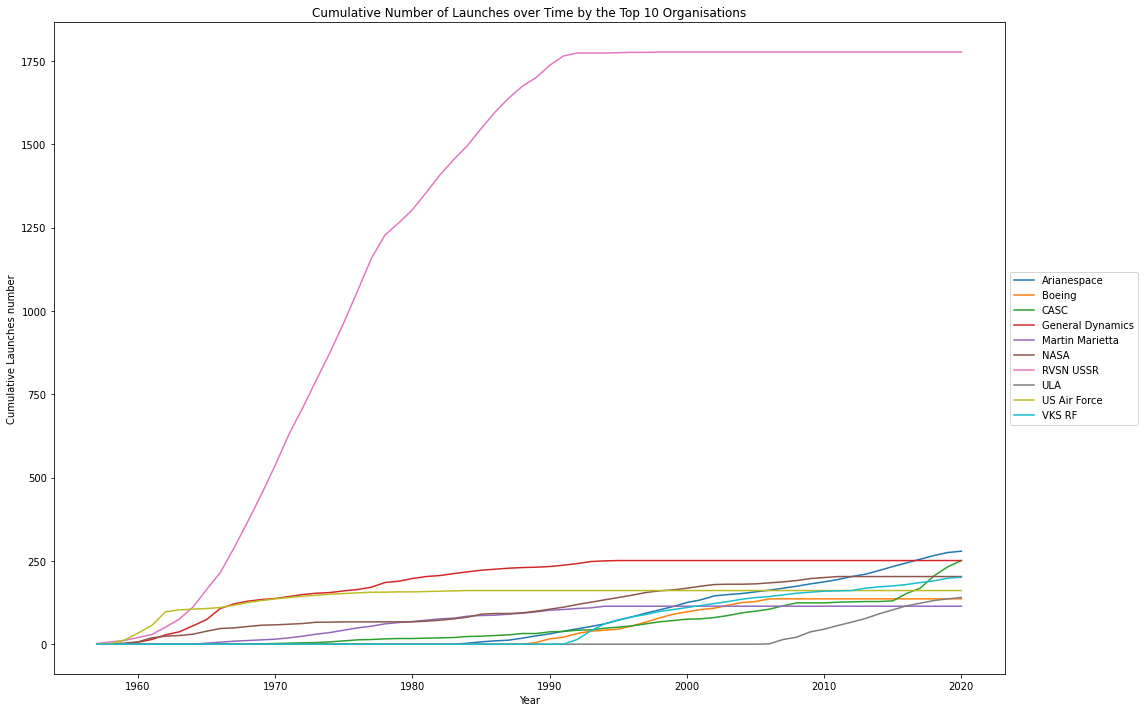

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
cumulative_launches_over_time_by_org.T.plot(kind='line', ax=ax)
plt.xlabel('Year')
plt.ylabel('Cumulative Launches number')
plt.title('Cumulative Number of Launches over Time by the Top 10 Organisations')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
# Preparing data, renaming data form Kazakhstan to Russian Federation
df_race = df.copy()
df_race[df_race.country=='Kazakhstan']['country'] = 'Russian Federation'
df_race = df_race[(df_race.country=='Russian Federation') | (df_race.country=='USA')]
df_race.sample(3)

<ipython-input-97-f0b8f87a2863>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,organisation,location,date,detail,rocket_status,price,mission_status,country,country_code,year,month
4032,General Dynamics,"SLC-4W, Vandenberg AFB, California, USA",1964-07-06 18:51:00+00:00,Atlas-LV3 Agena-D | KH-7 Gambit 4009,StatusRetired,NaN,Success,USA,USA,1964,7
1161,MITT,"Svobodny Cosmodrome, Russia",2000-12-05 12:32:00+00:00,Start-1 | EROS A,StatusActive,NaN,Success,Russian Federation,RUS,2000,12
1280,Boeing,"SLC-2W, Vandenberg AFB, California, USA",1998-11-06 13:37:00+00:00,Delta II 7920-10C | MS-11,StatusRetired,NaN,Success,USA,USA,1998,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
df_race_launches_total = df_race.groupby(["country"], as_index=False).agg({'mission_status': pd.Series.count})
df_race_launches_total.rename(columns={'mission_status': 'total_number'}, inplace=True)
df_race_launches_total

,country,total_number
0,Russian Federation,1398
1,USA,1387


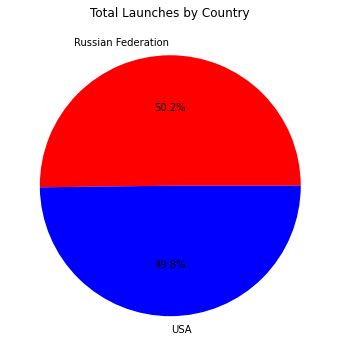

In [ ]:
plt.subplots(figsize=(8, 6))
plt.pie(df_race_launches_total['total_number'], labels=df_race_launches_total['country'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Total Launches by Country')
plt.show()


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
df_race_launches_over_time_by_country = pd.pivot_table(df_race, 
index='country',
columns='year', 
values='mission_status',
aggfunc='count')
margins=True
df_race_launches_over_time_by_country

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,NaN,NaN,NaN,NaN,2.00,8.00,8.00,8.00,10.00,15.00,...,2.00,1.00,7.00,6.00,4.00,6.00,6.00,8.00,9.00,3.00
USA,1.00,23.00,16.00,30.00,43.00,60.00,17.00,24.00,33.00,47.00,...,19.00,16.00,20.00,24.00,22.00,27.00,30.00,34.00,27.00,21.00


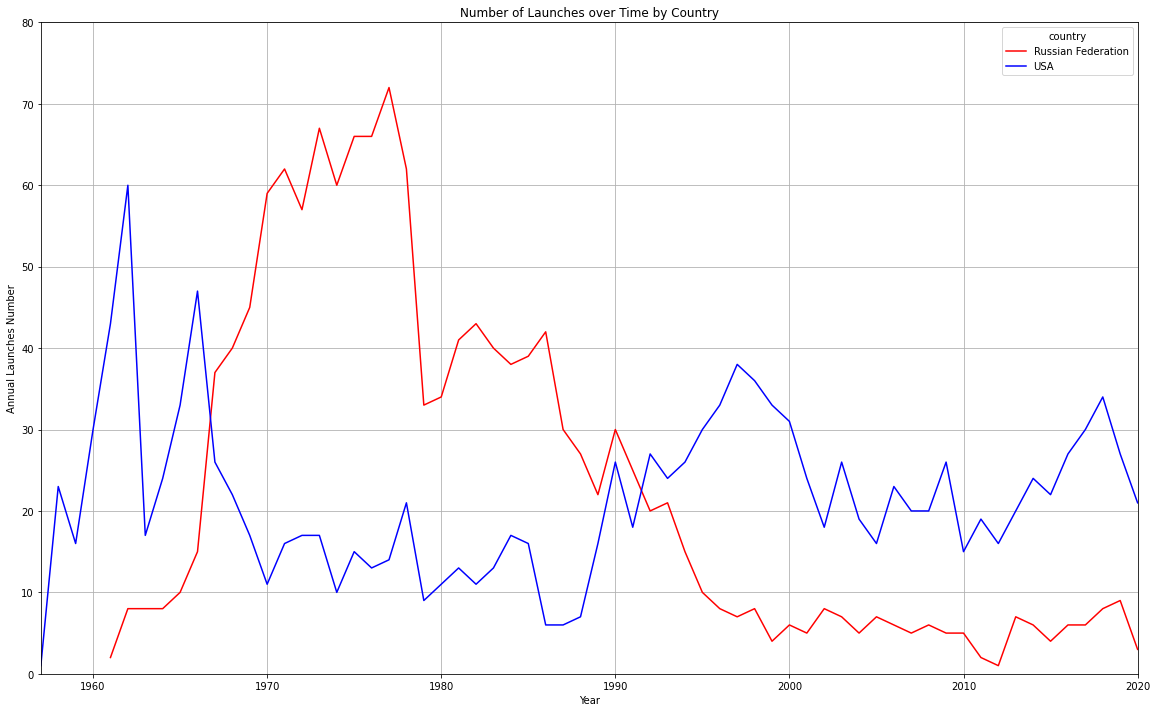

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
df_race_launches_over_time_by_country.T.plot(kind='line', color=['red', 'blue'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Annual Launches Number')
plt.title('Number of Launches over Time by Country')
plt.tight_layout()
plt.xlim(1957, 2020)
plt.ylim(0, 80)
plt.grid(True)
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
df_race.mission_status.value_counts()

Success              2526
Failure               195
Partial Failure        63
Prelaunch Failure       1
Name: mission_status, dtype: int64

In [ ]:
df_race_failures = df_race[df_race.mission_status != 'Success']

df_race_failures_over_time_by_country = pd.pivot_table(df_race_failures, 
index='country',
columns='year', 
values='mission_status',
aggfunc='count')
margins=True

df_race_failures_over_time_by_country = df_race_failures_over_time_by_country.fillna(0) 
df_race_failures_over_time_by_country

year,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,0.00,0.00,0.00,0.00,2.00,1.00,4.00,1.00,3.00,2.00,...,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
USA,1.00,18.00,10.00,14.00,16.00,10.00,4.00,5.00,7.00,7.00,...,1.00,1.00,1.00,1.00,2.00,1.00,0.00,1.00,3.00,1.00


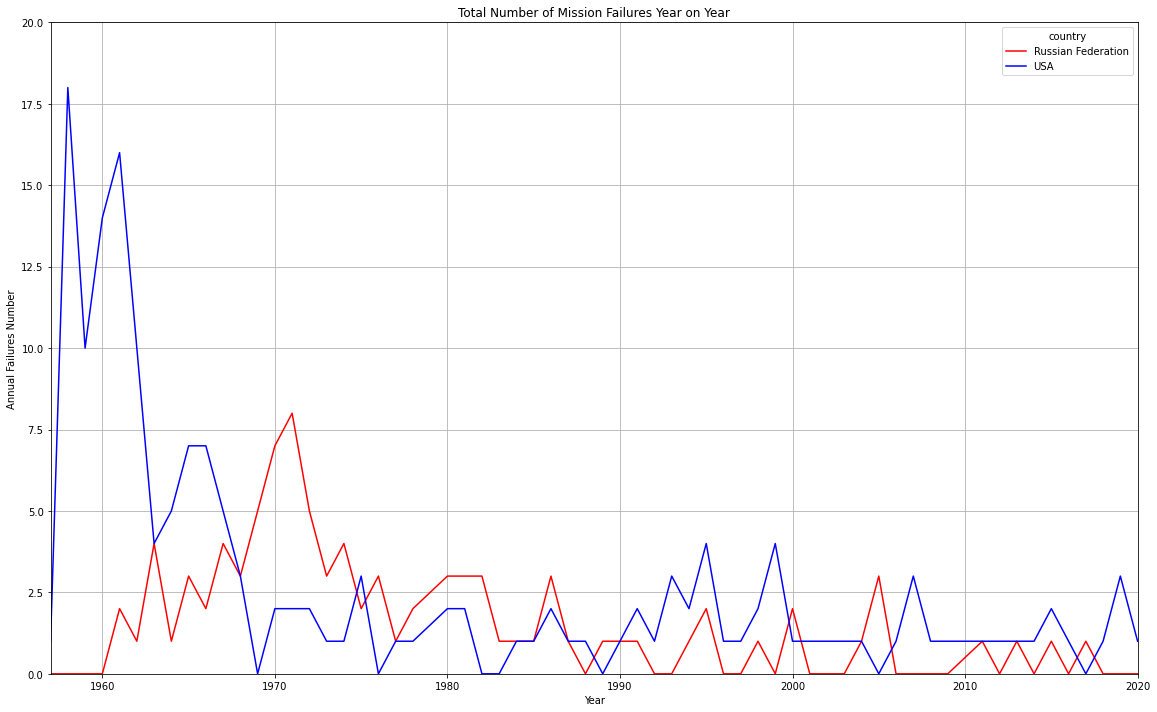

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
df_race_failures_over_time_by_country.T.plot(kind='line', color=['red', 'blue'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Annual Failures Number')
plt.title('Total Number of Mission Failures Year on Year')
plt.tight_layout()
plt.xlim(1957, 2020)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
df_race_launches_analysis = pd.pivot_table(df_race, 
index=['year', 'country'],
columns=['mission_status'], 
values='month',
aggfunc='count')
margins=True

df_race_launches_analysis[:5]

,mission_status,Failure,Partial Failure,Prelaunch Failure,Success
year,country,,,,
1957,USA,1.00,NaN,NaN,NaN
1958,USA,16.00,2.00,NaN,5.00
1959,USA,8.00,2.00,NaN,6.00
1960,USA,14.00,NaN,NaN,16.00
1961,Russian Federation,2.00,NaN,NaN,NaN


In [ ]:
df_race_launches_analysis = df_race_launches_analysis.fillna(0)  
df_race_launches_analysis['Total'] = df_race_launches_analysis.sum(axis=1)
df_race_launches_analysis['Failure_perc'] = (df_race_launches_analysis['Total'] - df_race_launches_analysis['Success']) / df_race_launches_analysis['Total']
df_race_launches_analysis['Success_perc'] = (df_race_launches_analysis['Success']) / df_race_launches_analysis['Total']
df_race_launches_analysis[:5]

,mission_status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Failure_perc,Success_perc
year,country,,,,,,,
1957,USA,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1958,USA,16.00,2.00,0.00,5.00,23.00,0.78,0.22
1959,USA,8.00,2.00,0.00,6.00,16.00,0.62,0.38
1960,USA,14.00,0.00,0.00,16.00,30.00,0.47,0.53
1961,Russian Federation,2.00,0.00,0.00,0.00,2.00,1.00,0.00


In [ ]:
df_race_launches_analysis2 = pd.DataFrame(df_race_launches_analysis)
df_race_launches_analysis2 = df_race_launches_analysis2.reset_index()
df_race_launches_analysis2[:5]

mission_status,year,country,Failure,Partial Failure,Prelaunch Failure,Success,Total,Failure_perc,Success_perc
0,1957,USA,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,1958,USA,16.00,2.00,0.00,5.00,23.00,0.78,0.22
2,1959,USA,8.00,2.00,0.00,6.00,16.00,0.62,0.38
3,1960,USA,14.00,0.00,0.00,16.00,30.00,0.47,0.53
4,1961,Russian Federation,2.00,0.00,0.00,0.00,2.00,1.00,0.00


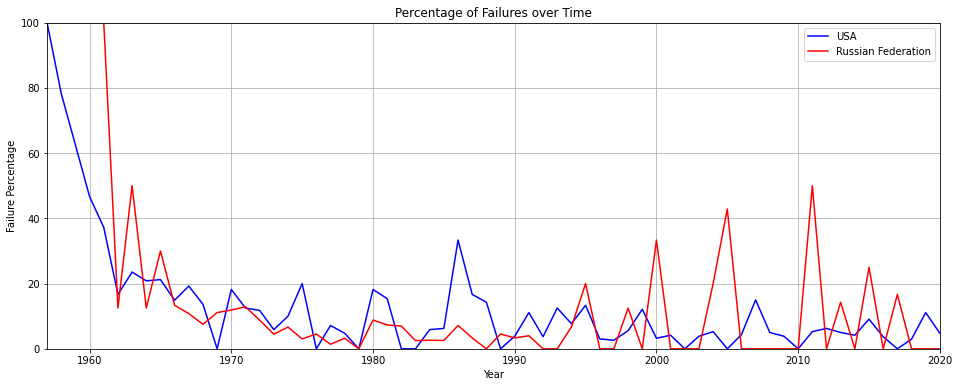

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
colors = {'USA': 'blue', 'Russian Federation': 'red'}
for country in df_race_launches_analysis2['country'].unique():
    df_country = df_race_launches_analysis2[df_race_launches_analysis2['country'] == country]
    ax.plot(df_country['year'], df_country['Failure_perc']*100, label=country, color=colors[country])
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Failure Percentage')
ax.set_title('Percentage of Failures over Time')
plt.xlim(1957, 2020)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
df_race_launches_analysis2

mission_status,year,country,Failure,Partial Failure,Prelaunch Failure,Success,Total,Failure_perc,Success_perc
0,1957,USA,1.00,0.00,0.00,0.00,1.00,1.00,0.00
1,1958,USA,16.00,2.00,0.00,5.00,23.00,0.78,0.22
2,1959,USA,8.00,2.00,0.00,6.00,16.00,0.62,0.38
3,1960,USA,14.00,0.00,0.00,16.00,30.00,0.47,0.53
4,1961,Russian Federation,2.00,0.00,0.00,0.00,2.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...
119,2018,USA,0.00,1.00,0.00,33.00,34.00,0.03,0.97
120,2019,Russian Federation,0.00,0.00,0.00,9.00,9.00,0.00,1.00
121,2019,USA,1.00,2.00,0.00,24.00,27.00,0.11,0.89
122,2020,Russian Federation,0.00,0.00,0.00,3.00,3.00,0.00,1.00


In [ ]:
df_race_launches_analysis3 = df_race_launches_analysis2.groupby(["year", "country"], as_index=False).agg({'Total': pd.Series.sum})
df_race_launches_analysis3

mission_status,year,country,Total
0,1957,USA,1.00
1,1958,USA,23.00
2,1959,USA,16.00
3,1960,USA,30.00
4,1961,Russian Federation,2.00
...,...,...,...
119,2018,USA,34.00
120,2019,Russian Federation,9.00
121,2019,USA,27.00
122,2020,Russian Federation,3.00


In [ ]:
df_race_launches_analysis3['year_country'] = df_race_launches_analysis3["year"].astype(str) + '-' + df_race_launches_analysis3["country"] + '-' + df_race_launches_analysis3["Total"].astype(str)
leading_country = df_race_launches_analysis3.loc[df_race_launches_analysis3.groupby("year")["Total"].idxmax(), "year_country"]
leading_country = leading_country.str.split("-", expand=True)
leading_country.columns = ['year', 'country', 'total_missions']
leading_country = leading_country.astype({'year': 'int64'})
leading_country

,year,country,total_missions
0,1957,USA,1.0
1,1958,USA,23.0
2,1959,USA,16.0
3,1960,USA,30.0
5,1961,USA,43.0
...,...,...,...
115,2016,USA,27.0
117,2017,USA,30.0
119,2018,USA,34.0
121,2019,USA,27.0


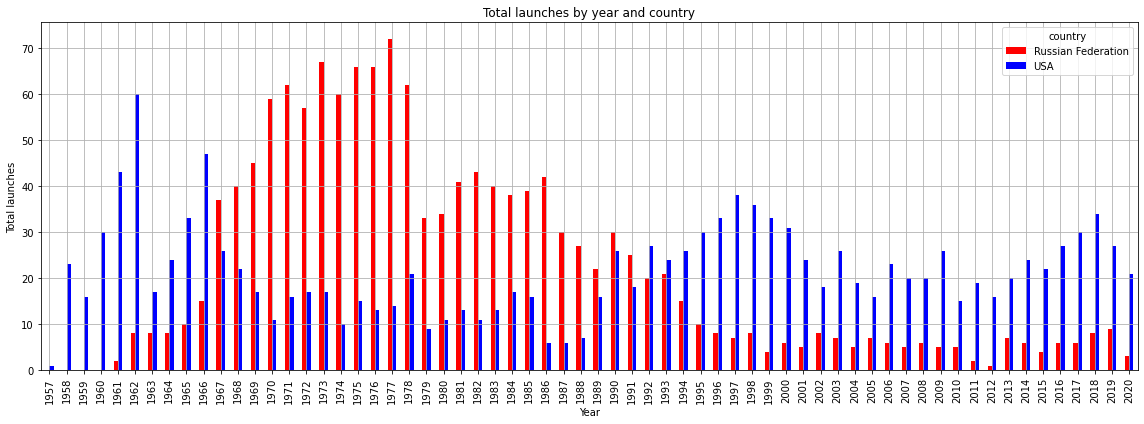

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
df_race_launches_analysis3.pivot(index='year', columns='country', values='Total').plot(kind='bar', ax=ax, color=['red', 'blue'])
plt.xlabel('Year')
plt.ylabel('Total launches')
plt.title('Total launches by year and country')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
df_race_launches_analysis4 = df_race_launches_analysis2.groupby(["year", "country"], as_index=False).agg({'Success': pd.Series.sum})
df_race_launches_analysis4['year_country'] = df_race_launches_analysis4["year"].astype(str) + '-' + df_race_launches_analysis4["country"] + '-' + df_race_launches_analysis4["Success"].astype(str)
leading_country2 = df_race_launches_analysis4.loc[df_race_launches_analysis4.groupby("year")["Success"].idxmax(), "year_country"]
leading_country2 = leading_country2.str.split("-", expand=True)
leading_country2.columns = ['year', 'country', 'total_success_missions']
leading_country2 = leading_country2.astype({'year': 'int64'})
leading_country2.value_counts()

year  country             total_success_missions
1957  USA                 0.0                       1
1958  USA                 5.0                       1
1991  Russian Federation  24.0                      1
1992  USA                 26.0                      1
1993  Russian Federation  21.0                      1
                                                   ..
1983  Russian Federation  39.0                      1
1984  Russian Federation  37.0                      1
1985  Russian Federation  38.0                      1
1986  Russian Federation  39.0                      1
2020  USA                 20.0                      1
Length: 64, dtype: int64

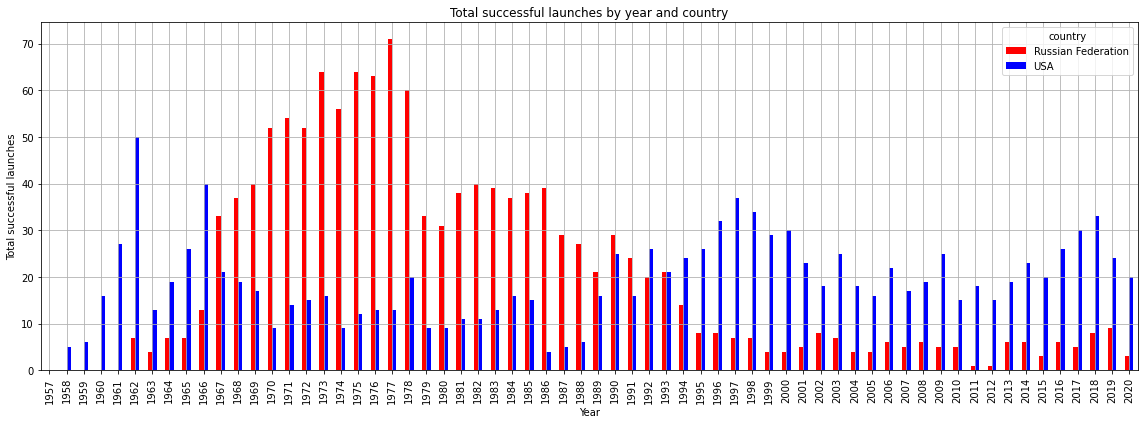

In [ ]:
fig2, ax2 = plt.subplots(figsize=(16, 6))
df_race_launches_analysis4.pivot(index='year', columns='country', values='Success').plot(kind='bar', ax=ax2, color=['red', 'blue'])
plt.xlabel('Year')
plt.ylabel('Total successful launches')
plt.title('Total successful launches by year and country')
plt.tight_layout()
plt.grid(True)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
# Which organisation was dominant in the 1970s and 1980s? 
launches_over_time_by_org2 = pd.pivot_table(df.query('year > 1969 and year < 1990'), 
index='organisation',
columns='year', 
values='mission_status',
aggfunc='count')
margins=True
launches_over_time_by_org2 = launches_over_time_by_org2.fillna(0) 
launches_over_time_by_org2[:3]

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
organisation,,,,,,,,,,,,,,,,,,,,
ASI,1.00,2.00,1.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
Arianespace,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,4.00,3.00,2.00,6.00,7.00
Boeing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00


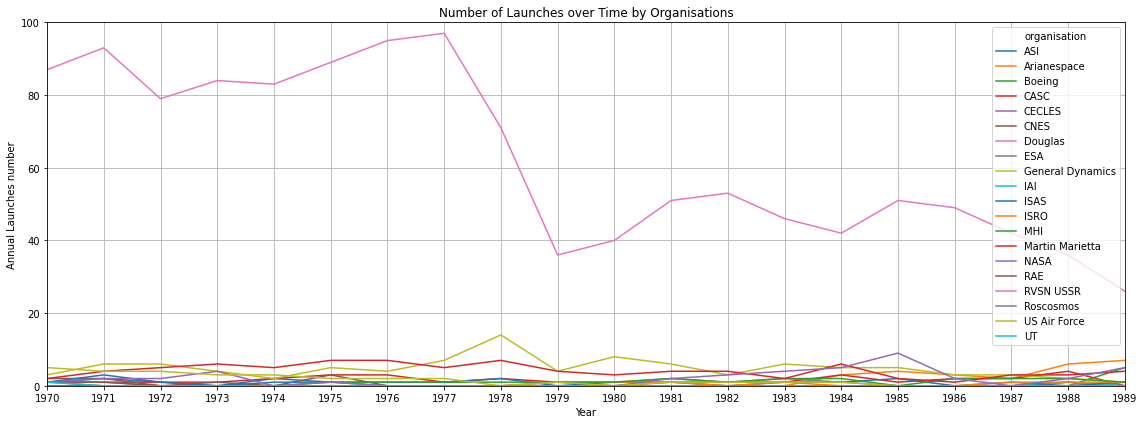

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
launches_over_time_by_org2.T.plot(kind='line', ax=ax)
plt.xlabel('Year')
plt.ylabel('Annual Launches number')
plt.title('Number of Launches over Time by Organisations')
plt.xlim(1970, 1989)
plt.ylim(0, 100)
plt.grid(True)
x_axis_values = range(int(plt.xlim()[0]), int(plt.xlim()[1])+1)
ax.set_xticks(x_axis_values)

plt.tight_layout()
plt.show()


In [ ]:
# Which organisation was dominant in 2018, 2019 and 2020?
launches_over_time_by_org3 = pd.pivot_table(df.query('year > 2017 and year < 2021'), 
index='organisation',
columns='year', 
values='mission_status',
aggfunc='count')
margins=True
launches_over_time_by_org3 = launches_over_time_by_org3.fillna(0) 
launches_over_time_by_org3[:3]

year,2018,2019,2020
organisation,,,
Arianespace,11.00,9.00,4.00
Blue Origin,2.00,3.00,0.00
CASC,37.00,27.00,19.00


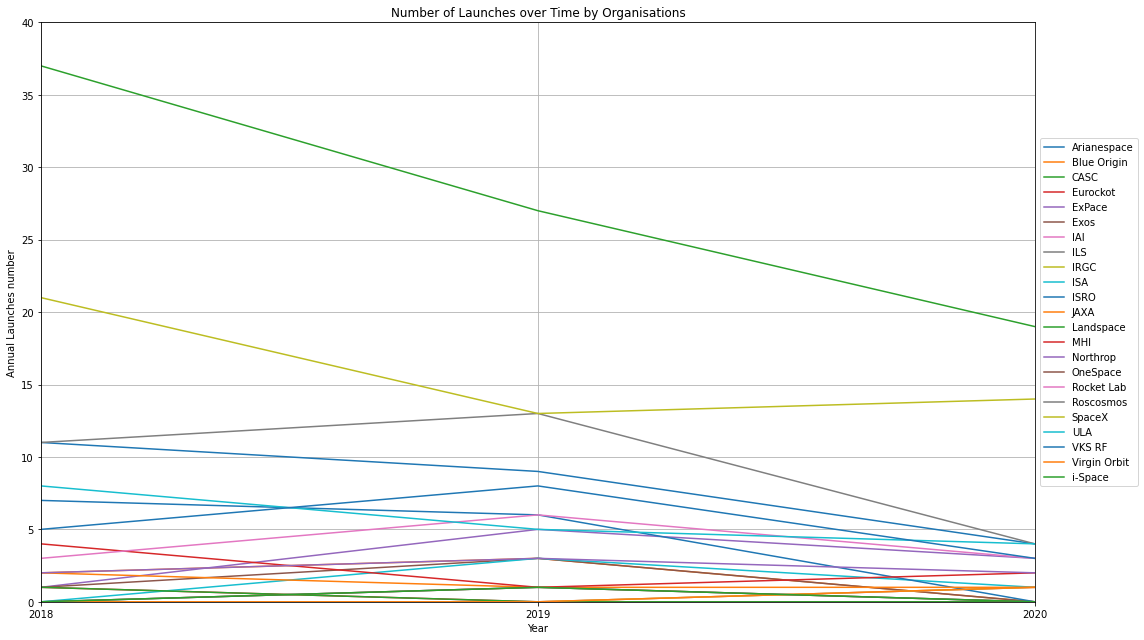

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

launches_over_time_by_org3.T.plot(kind='line', ax=ax)

plt.xticks([2018, 2019, 2020])
plt.xlabel('Year')
plt.ylabel('Annual Launches number')
plt.title('Number of Launches over Time by Organisations')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlim(2018, 2020)
plt.ylim(0, 40)
plt.grid(True)
x_axis_values = range(int(plt.xlim()[0]), int(plt.xlim()[1])+1)
ax.set_xticks(x_axis_values)
plt.tight_layout()
plt.show()